In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
path = '/mnt/c/Users/alon4/Dropbox/My PC (LAPTOP-L5MMEHHN)/Desktop/Studies/Lab C1/Molecular Spectroscopy'
files = ['NEXT Cigar.xlsx', 'Marlborro Cigar (1).xlsx', 'LM Cigar 00.xlsx', 'Galuois Cigar (1).xlsx', 'Canadian Cigar.xlsx']
files = [os.path.join(path,'Measurements/Cigar/'+f) for f in files]
def readXlsx(path):
    return pd.read_excel(path).to_numpy().T

/mnt/c/Users/alon4/Dropbox/My PC (LAPTOP-L5MMEHHN)/Desktop/Studies/Lab C1/Molecular Spectroscopy/Measurements/Cigar/NEXT Cigar.xlsx


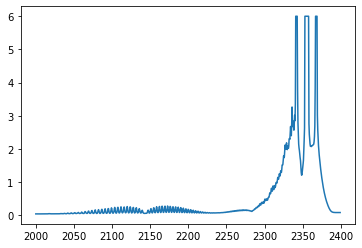

/mnt/c/Users/alon4/Dropbox/My PC (LAPTOP-L5MMEHHN)/Desktop/Studies/Lab C1/Molecular Spectroscopy/Measurements/Cigar/Marlborro Cigar (1).xlsx


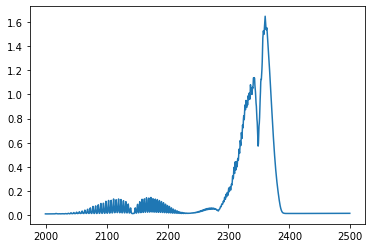

/mnt/c/Users/alon4/Dropbox/My PC (LAPTOP-L5MMEHHN)/Desktop/Studies/Lab C1/Molecular Spectroscopy/Measurements/Cigar/LM Cigar 00.xlsx


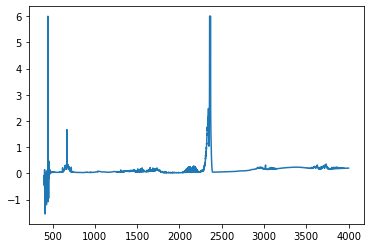

/mnt/c/Users/alon4/Dropbox/My PC (LAPTOP-L5MMEHHN)/Desktop/Studies/Lab C1/Molecular Spectroscopy/Measurements/Cigar/Galuois Cigar (1).xlsx


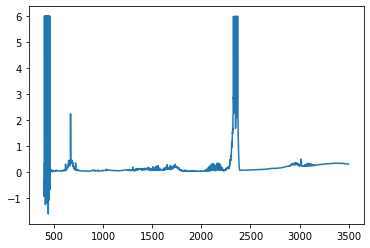

/mnt/c/Users/alon4/Dropbox/My PC (LAPTOP-L5MMEHHN)/Desktop/Studies/Lab C1/Molecular Spectroscopy/Measurements/Cigar/Canadian Cigar.xlsx


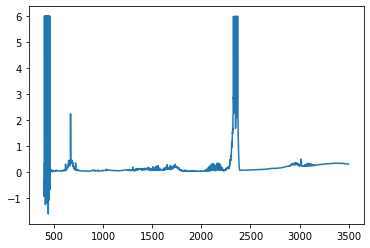

In [9]:
for file in files:
    spectrum = readXlsx(file) # [[Wavenumber], [Absorbance]]
    print(file)
    plt.plot(spectrum[0],spectrum[1])
    plt.show()